In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from tqdm import tqdm
import matplotlib.animation as anim

In [2]:
class Particle():
    
    #init
    def __init__(self, r0,v0, a0,t, m, radius, Id):
        
        self.dt = t[1]- t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t), len(r0)) )
        self.vVector = np.zeros( (len(t), len(v0)) )
        self.aVector = np.zeros( (len(t), len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
        
    def CheckWallLimits2D(self,limits,dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = -0.9*self.v[i]
            if self.r[i] - self.radius < -limits[i]:
                self.v[i] = -0.9*self.v[i]
    
    def CheckWallLimits3D(self,limits,dim=3):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = -self.v[i]
            if self.r[i] - self.radius < -limits[i]:
                self.v[i] = -self.v[i]
    
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector [i] = v
        
    # Getters
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector
    
    def GetRVelocityVector(self):
        return self.RvVector
    
    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self, factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
    
    def ReduceVelocity(self, factor):
        
        self.RvVector = np.array([self.vVector[0]]) # initial condition
        
        
        for i in range(1,len(self.vVector)):
            if i%factor ==0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [3]:
#Discretization
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt, dt)
print(len(t))


3001


In [4]:
def GetParticles2D(NParticles,Limit,Velo,Dim=2,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.zeros(Dim)
        v0 = np.zeros(Dim)
        a0 = np.zeros(Dim)
        
        x0[0],x0[1] = -15,5
        v0[0],v0[1] = 1,0
        a0[0],a0[1] = 0,-9.8
        
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
    
    return Particles_

In [5]:
Limits = np.array([20.,20.])

In [6]:
def RunSimulation2D(t,NParticles = 100, Velo = 6):
    
    Particles = GetParticles2D(NParticles,Limits[0],Velo = Velo,dt=dt)
    
    for it in tqdm(range(len(t))): #Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits2D(Limits,2)
            Particles[i].Evolution(it)
            
    return Particles

In [7]:
def GetParticles3D(NParticles,Limit,Velo,Dim=3,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit -1.0, size = Dim )
        v0 = np.random.uniform( -Velo, Velo, size = Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
    
    return Particles_

In [8]:
def RunSimulation3D(t,NParticles = 100, Velo = 6):
    
    Particles = GetParticles3D(NParticles,Limits[0],Dim=3,Velo = Velo,dt=dt)
    
    for it in tqdm(range(len(t))): #Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits3D(Limits)
            Particles[i].Evolution(it)
            
    return Particles

In [9]:
Particles = RunSimulation2D(t,1,Velo = 50)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3001/3001 [00:00<00:00, 12164.25it/s]


In [10]:
len(Particles[0].GetPositionVector())

3001

In [11]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        p.ReduceVelocity(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor==0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [12]:
redt = ReduceTime(t,10)
len(Particles[0].GetRPositionVector())

301

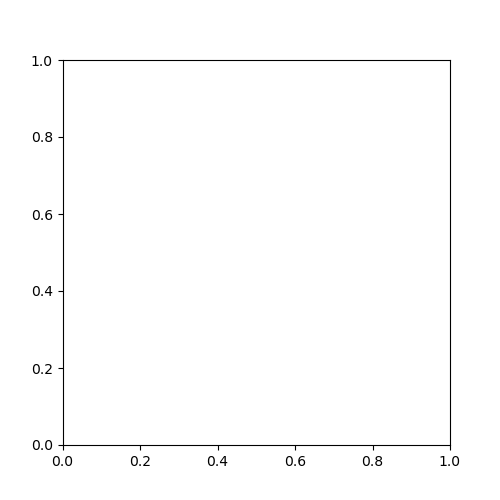

In [13]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    
def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        
        vx = p.GetRVelocityVector()[i,0]
        vy = p.GetRVelocityVector()[i,1]
        
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False)
        plot = ax.add_patch(circle)
        arrow = plt.arrow(x,y,vx,vy, color = "red", head_width = 0.5)
        plot = ax.add_patch(arrow)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

In [14]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=50, metadata=dict(artist='Me'))
Animation.save('FallingBall.mp4', writer=writer_)

In [15]:
def RemoveParticles(Particles):
    print('--- Deleting Particles---')
    for i in range(len(Particles)):
        if len(Particles) > 0:
            del Particles[-1]

In [16]:
RemoveParticles(Particles)

--- Deleting Particles---


In [17]:
Limits = np.array([10.,10.,10.])

In [18]:
Particles = RunSimulation3D(t,100,Velo = 20)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3001/3001 [00:25<00:00, 116.08it/s]


In [19]:
redt = ReduceTime(t,10)
len(Particles[0].GetRPositionVector())

301

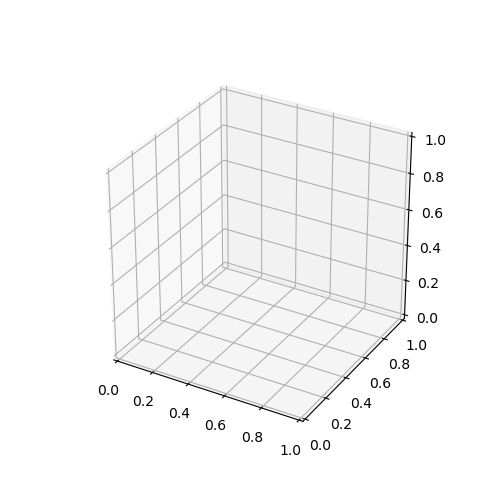

In [20]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    ax.set_zlim(-Limits[2],Limits[2])
    
def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]
        
        
        vx = p.GetVelocityVector()[i,0]
        vy = p.GetVelocityVector()[i,1]
        
        ax.scatter(x,y,z, c="blue")
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

In [21]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=50, metadata=dict(artist='Me'))
Animation.save('Gas 3D.mp4', writer=writer_)

In [22]:
def RemoveParticles(Particles):
    print('--- Deleting Particles---')
    for i in range(len(Particles)):
        if len(Particles) > 0:
            del Particles[-1]

In [23]:
RemoveParticles(Particles)

--- Deleting Particles---
